In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv', header=None)
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
              'Viscera weight', 'Shell weight', 'Rings']

In [3]:
# 3.1
data = df['Sex'].value_counts().to_frame().rename(columns = {'Sex': 'count'})
data['%'] = (100 * data['count'] / df['Sex'].count()).round(2)
data

,count,%
M,1528,36.58
I,1342,32.13
F,1307,31.29


In [4]:
# 3.2
table = df.describe()[1:].T
table

,mean,std,min,25%,50%,75%,max
Length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


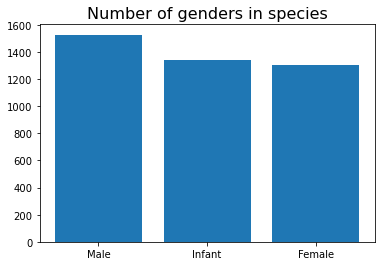

In [5]:
# 3.3
x = ["Male", "Infant", "Female"]
y = df['Sex'].value_counts().values
plt.bar(x, y)
plt.title('Number of genders in species', fontsize = 16)
plt.show()

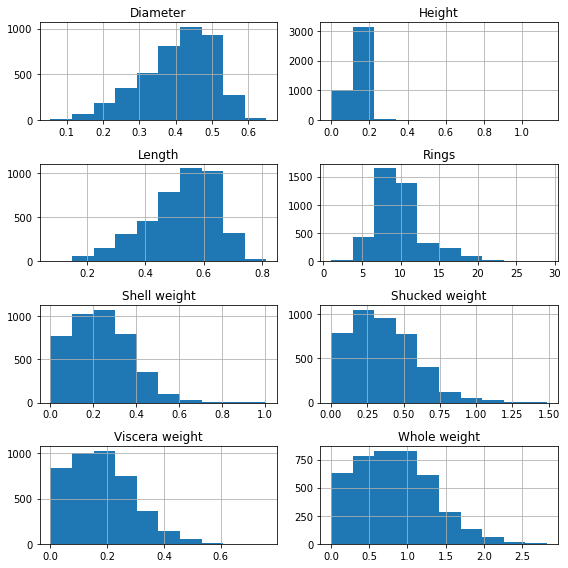

In [6]:
# 3.4
histogram = df.hist(layout=(4,2), figsize=(8,8))
plt.tight_layout()

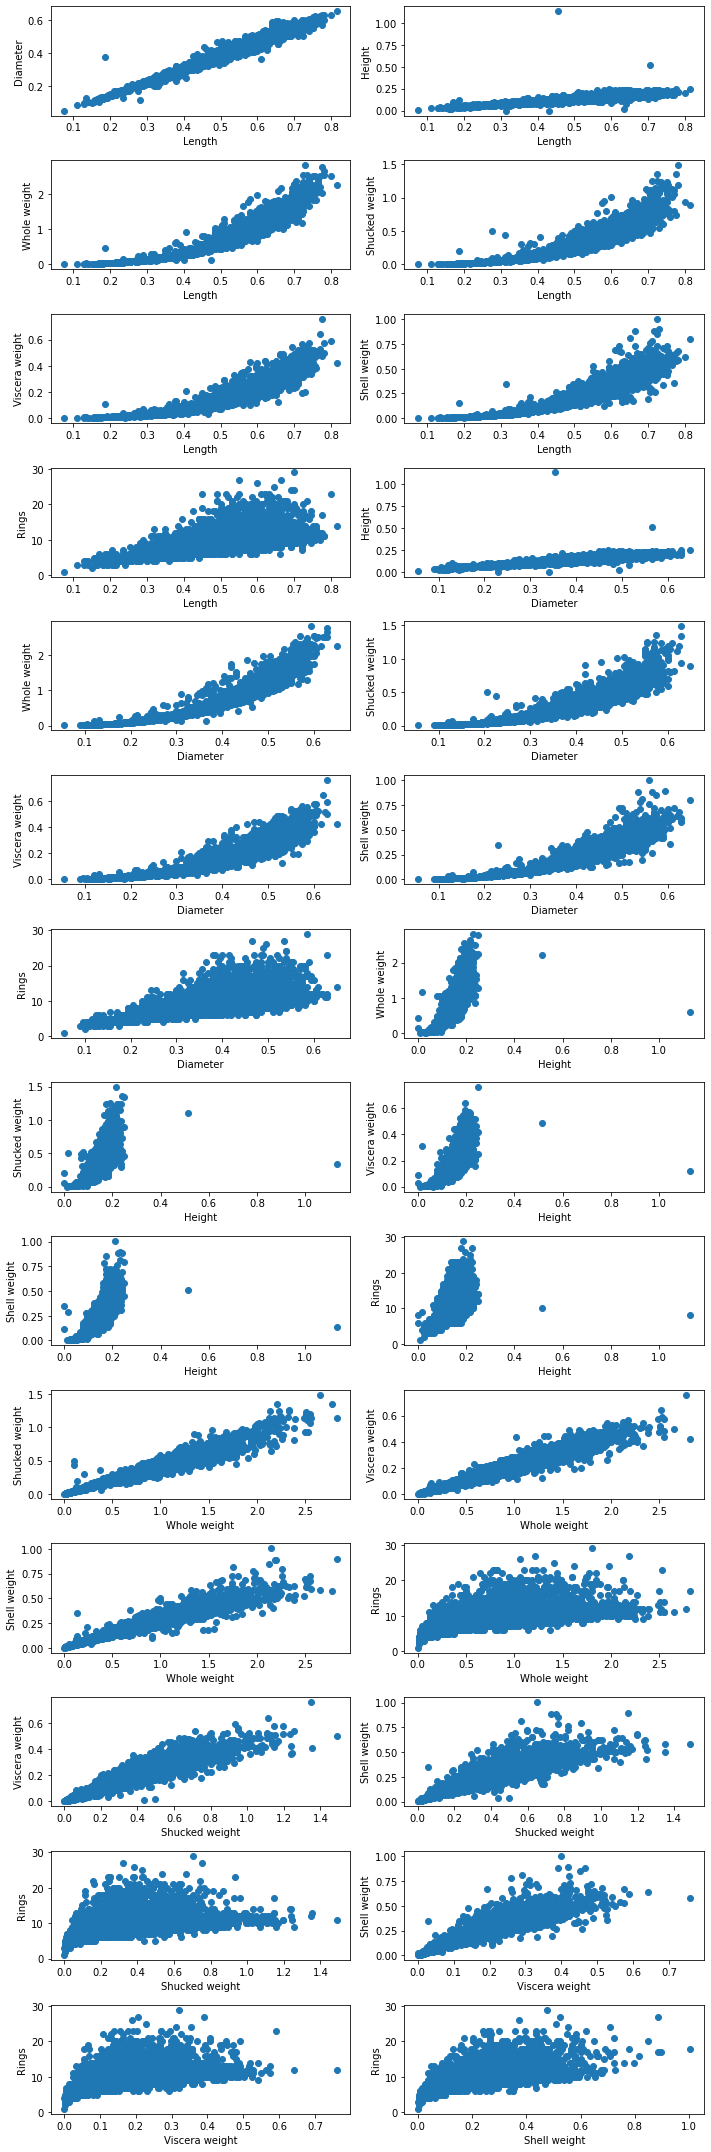

In [7]:
# 4.2
fig, axs = plt.subplots(14, 2, figsize=(10, 30))
i = 0
for z, column1 in enumerate(df.columns[1:]):
    for column2 in df.columns[z+2:]:
        axs[i//2, i%2].scatter(x=df[column1], y=df[column2])
        axs[i//2, i%2].set(xlabel = column1, ylabel = column2)
        i += 1
plt.tight_layout()

In [8]:
# 4.3
cor = df.corr()
cor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


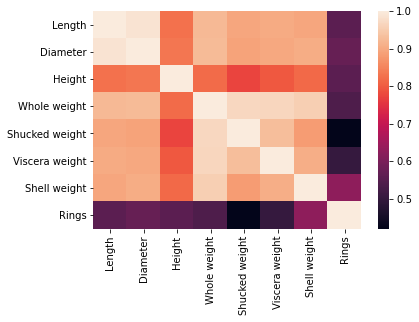

In [9]:
# 4.4
heatmap = sns.heatmap(df.corr())

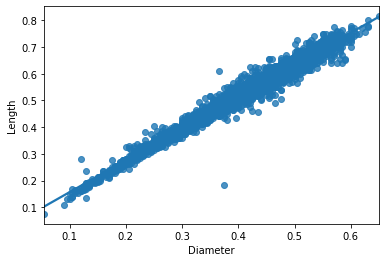

In [10]:
# 4.5 
regr = sns.regplot(x=df[cor[cor < 1].idxmax(axis=1)[0]], y=df[cor[cor < 1].idxmax(axis=1)[1]])

In [11]:
# 5.2
tab = df.groupby(['Sex']).describe().T.reset_index()
tab = tab.pivot_table(index=['level_0', ], columns='level_1').stack(level=0).drop('count', axis=1).rename_axis(['Feature', 'Sex'])
tab

level_1                  25%       50%        75%      max       mean     min  \
Feature        Sex                                                              
Diameter       F    0.410000   0.46500   0.505000   0.6500   0.454732  0.1950   
               I    0.270000   0.33500   0.390000   0.5500   0.326494  0.0550   
               M    0.395000   0.45500   0.500000   0.6300   0.439287  0.1100   
Height         F    0.140000   0.16000   0.175000   1.1300   0.158011  0.0150   
               I    0.085000   0.11000   0.130000   0.2200   0.107996  0.0000   
               M    0.130000   0.15500   0.175000   0.5150   0.151381  0.0250   
Length         F    0.525000   0.59000   0.640000   0.8150   0.579093  0.2750   
               I    0.360000   0.43500   0.510000   0.7250   0.427746  0.0750   
               M    0.505000   0.58000   0.630000   0.7800   0.561391  0.1550   
Rings          F    9.000000  10.00000  12.000000  29.0000  11.129304  5.0000   
               I    6.000000   8.00000   9.000000  21.0000   7.890462  1.0000   
               M    9.000000  10.00000  12.000000  27.0000  10.705497  3.0000   
Shell weight   F    0.213250   0.29500   0.375000   1.0050   0.302010  0.0250   
               I    0.064125   0.11300   0.178500   0.6550   0.128182  0.0015   
               M    0.190000   0.27600   0.355500   0.8970   0.281969  0.0050   
Shucked weight F    0.295000   0.44050   0.573250   1.4880   0.446188  0.0310   
               I    0.090000   0.16975   0.270375   0.7735   0.191035  0.0010   
               M    0.276375   0.42175   0.566000   1.3510   0.432946  0.0065   
Viscera weight F    0.159000   0.22400   0.297250   0.5900   0.230689  0.0210   
               I    0.042500   0.08050   0.130000   0.4405   0.092010  0.0005   
               M    0.145875   0.21000   0.278000   0.7600   0.215545  0.0030   
Whole weight   F    0.730000   1.03850   1.320250   2.6570   1.046532  0.0800   
               I    0.205500   0.38400   0.599375   2.0495   0.431363  0.0020   
               M    0.671625   0.97575   1.265625   2.8255   0.991459  0.0155   

level_1                  std  
Feature        Sex            
Diameter       F    0.070954  
               I    0.088109  
               M    0.084398  
Height         F    0.039984  
               I    0.031995  
               M    0.034804  
Length         F    0.086160  
               I    0.108858  
               M    0.102697  
Rings          F    3.104256  
               I    2.511554  
               M    3.026349  
Shell weight   F    0.125649  
               I    0.084927  
               M    0.130834  
Shucked weight F    0.198663  
               I    0.128405  
               M    0.223000  
Viscera weight F    0.097617  
               I    0.062536  
               M    0.104919  
Whole weight   F    0.430316  
               I    0.286275  
               M    0.470581

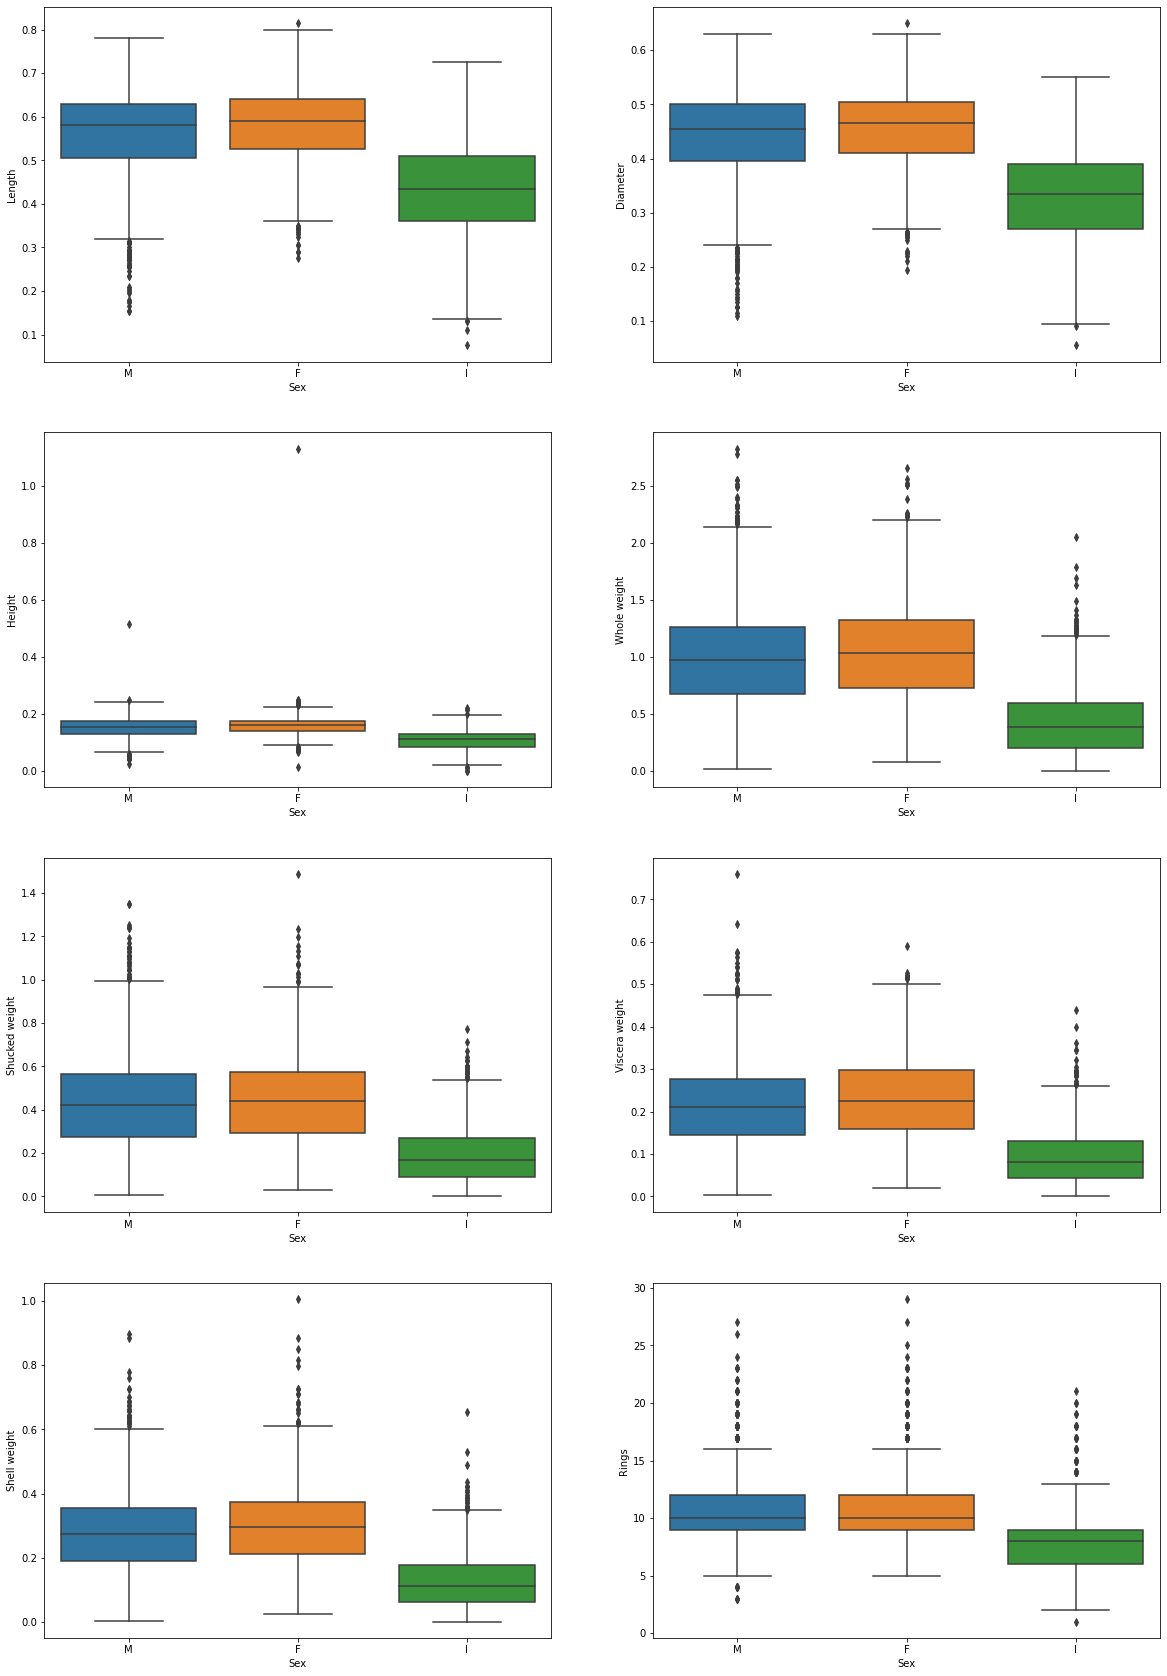

In [12]:
# 5.3
fig, axs = plt.subplots(4, 2, figsize=(20, 30))

for i, c in enumerate(df.columns[1:]):
    box = sns.boxplot(x="Sex", y=c, data=df, ax=axs[i//2][i%2])